## MLPs on MNIST

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [13]:
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [0]:
# if your keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

x_train, x_test = X_train / 255.0, X_test / 255.0

In [0]:
nb_epoch = 20

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

 <h3>  MLP + ReLU + Adam </h3>

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.3265 - accuracy: 0.9071 - val_loss: 0.1602 - val_accuracy: 0.9553
Epoch 2/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.1302 - accuracy: 0.9616 - val_loss: 0.1061 - val_accuracy: 0.9689
Epoch 3/20
50000/50000 [==============================] - 1s 27us/sample - loss: 0.0865 - accuracy: 0.9748 - val_loss: 0.0863 - val_accuracy: 0.9753
Epoch 4/20
50000/50000 [==============================] - 1s 27us/sample - loss: 0.0645 - accuracy: 0.9809 - val_loss: 0.0803 - val_accuracy: 0.9761
Epoch 5/20
50000/50000 [==============================] - 1s 27us/sample - loss: 0.0470 - accuracy: 0.9863 - val_loss: 0.0769 - val_accuracy: 0.9773
Epoch 6/20
50000/50000 [==============================] - 1s 27us/sample - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0837 - val_accuracy: 0.9760
Epoch 7/20
50000/50000 [==============================] 

Test score: 0.0914082626070628
Test accuracy: 0.9801


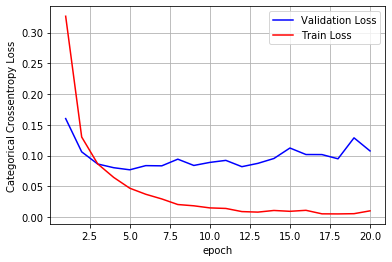

In [21]:
print('Test score:', results[0]) 
print('Test accuracy:', results[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + ReLU + Adam + Dropout </h2>

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 49us/sample - loss: 0.8374 - accuracy: 0.7300 - val_loss: 0.2247 - val_accuracy: 0.9379
Epoch 2/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.4205 - accuracy: 0.8800 - val_loss: 0.1643 - val_accuracy: 0.9534
Epoch 3/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.3386 - accuracy: 0.9046 - val_loss: 0.1410 - val_accuracy: 0.9605
Epoch 4/20
50000/50000 [==============================] - 2s 38us/sample - loss: 0.2927 - accuracy: 0.9162 - val_loss: 0.1192 - val_accuracy: 0.9665
Epoch 5/20
50000/50000 [==============================] - 2s 38us/sample - loss: 0.2621 - accuracy: 0.9268 - val_loss: 0.1147 - val_accuracy: 0.9684
Epoch 6/20
50000/50000 [==============================] - 2s 38us/sample - loss: 0.2414 - accuracy: 0.9340 - val_loss: 0.1046 - val_accuracy: 0.9698
Epoch 7/20
50000/50000 [==============================] 

Test score: 0.09824323466655187
Test accuracy: 0.9767


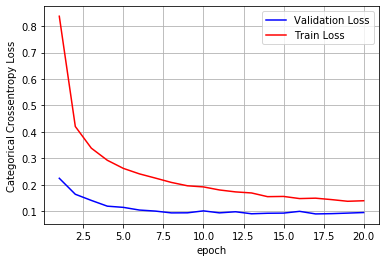

In [12]:
print('Test score:', results[0]) 
print('Test accuracy:', results[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + ReLU + Adam + Batch Normalization </h2>

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 79us/sample - loss: 0.2744 - accuracy: 0.9251 - val_loss: 0.1485 - val_accuracy: 0.9631
Epoch 2/20
50000/50000 [==============================] - 3s 58us/sample - loss: 0.0979 - accuracy: 0.9728 - val_loss: 0.0964 - val_accuracy: 0.9709
Epoch 3/20
50000/50000 [==============================] - 3s 60us/sample - loss: 0.0624 - accuracy: 0.9811 - val_loss: 0.0924 - val_accuracy: 0.9728
Epoch 4/20
50000/50000 [==============================] - 3s 58us/sample - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0950 - val_accuracy: 0.9721
Epoch 5/20
50000/50000 [==============================] - 3s 54us/sample - loss: 0.0344 - accuracy: 0.9900 - val_loss: 0.0865 - val_accuracy: 0.9764
Epoch 6/20
50000/50000 [==============================] - 3s 55us/sample - loss: 0.0300 - accuracy: 0.9907 - val_loss: 0.0999 - val_accuracy: 0.9728
Epoch 7/20
50000/50000 [==============================] 

Test score: 0.09070021249102465
Test accuracy: 0.9779


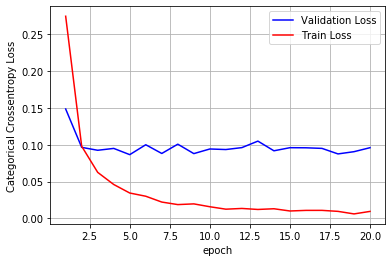

In [14]:
print('Test score:', results[0]) 
print('Test accuracy:', results[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> MLP + ReLU + Adam + Dropout + Batch Normalization</h2>

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 85us/sample - loss: 0.8782 - accuracy: 0.7462 - val_loss: 0.2500 - val_accuracy: 0.9395
Epoch 2/20
50000/50000 [==============================] - 3s 60us/sample - loss: 0.4540 - accuracy: 0.8763 - val_loss: 0.1513 - val_accuracy: 0.9589
Epoch 3/20
50000/50000 [==============================] - 3s 58us/sample - loss: 0.3630 - accuracy: 0.8983 - val_loss: 0.1278 - val_accuracy: 0.9649
Epoch 4/20
50000/50000 [==============================] - 3s 61us/sample - loss: 0.3111 - accuracy: 0.9143 - val_loss: 0.1193 - val_accuracy: 0.9658
Epoch 5/20
50000/50000 [==============================] - 3s 58us/sample - loss: 0.2885 - accuracy: 0.9205 - val_loss: 0.1077 - val_accuracy: 0.9704
Epoch 6/20
50000/50000 [==============================] - 3s 57us/sample - loss: 0.2737 - accuracy: 0.9237 - val_loss: 0.1012 - val_accuracy: 0.9701
Epoch 7/20
50000/50000 [==============================] 

Test score: 0.09050388644536725
Test accuracy: 0.9728


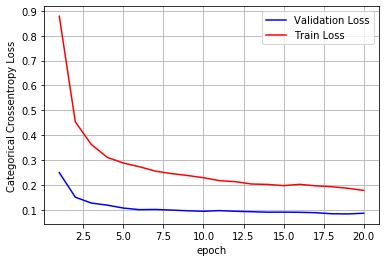

In [16]:
print('Test score:', results[0]) 
print('Test accuracy:', results[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 3 Layer MLP + ReLU + Adam </2>

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 52us/sample - loss: 0.2975 - accuracy: 0.9125 - val_loss: 0.1323 - val_accuracy: 0.9612
Epoch 2/20
50000/50000 [==============================] - 2s 41us/sample - loss: 0.1093 - accuracy: 0.9673 - val_loss: 0.0912 - val_accuracy: 0.9729
Epoch 3/20
50000/50000 [==============================] - 2s 41us/sample - loss: 0.0693 - accuracy: 0.9788 - val_loss: 0.0982 - val_accuracy: 0.9712
Epoch 4/20
50000/50000 [==============================] - 2s 41us/sample - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0999 - val_accuracy: 0.9716
Epoch 5/20
50000/50000 [==============================] - 2s 41us/sample - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0788 - val_accuracy: 0.9777
Epoch 6/20
50000/50000 [==============================] - 2s 41us/sample - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0891 - val_accuracy: 0.9775
Epoch 7/20
50000/50000 [==============================] 

Test score: 0.11227481371758283
Test accuracy: 0.9809


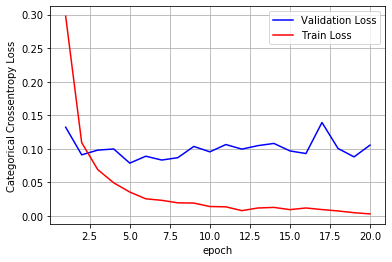

In [18]:
print('Test score:', results[0]) 
print('Test accuracy:', results[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 3 Layer MLP + RelU + Adam + Dropout </h2>

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 59us/sample - loss: 0.9460 - accuracy: 0.6898 - val_loss: 0.2319 - val_accuracy: 0.9383
Epoch 2/20
50000/50000 [==============================] - 2s 44us/sample - loss: 0.4179 - accuracy: 0.8859 - val_loss: 0.1588 - val_accuracy: 0.9598
Epoch 3/20
50000/50000 [==============================] - 2s 43us/sample - loss: 0.3226 - accuracy: 0.9134 - val_loss: 0.1272 - val_accuracy: 0.9670
Epoch 4/20
50000/50000 [==============================] - 2s 44us/sample - loss: 0.2760 - accuracy: 0.9287 - val_loss: 0.1187 - val_accuracy: 0.9713
Epoch 5/20
50000/50000 [==============================] - 2s 43us/sample - loss: 0.2396 - accuracy: 0.9373 - val_loss: 0.1121 - val_accuracy: 0.9720
Epoch 6/20
50000/50000 [==============================] - 2s 44us/sample - loss: 0.2138 - accuracy: 0.9452 - val_loss: 0.1036 - val_accuracy: 0.9728
Epoch 7/20
50000/50000 [==============================] 

Test score: 0.10055661600154113
Test accuracy: 0.9792


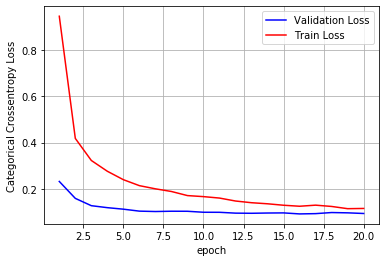

In [20]:
print('Test score:', results[0]) 
print('Test accuracy:', results[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 3 Layer MLP + ReLU + Batch Normalization + Adam

In [21]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 105us/sample - loss: 0.2440 - accuracy: 0.9327 - val_loss: 0.1218 - val_accuracy: 0.9654
Epoch 2/20
50000/50000 [==============================] - 4s 71us/sample - loss: 0.0855 - accuracy: 0.9748 - val_loss: 0.0993 - val_accuracy: 0.9714
Epoch 3/20
50000/50000 [==============================] - 4s 70us/sample - loss: 0.0563 - accuracy: 0.9832 - val_loss: 0.0903 - val_accuracy: 0.9718
Epoch 4/20
50000/50000 [==============================] - 4s 71us/sample - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.1006 - val_accuracy: 0.9701
Epoch 5/20
50000/50000 [==============================] - 3s 69us/sample - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.0856 - val_accuracy: 0.9768
Epoch 6/20
50000/50000 [==============================] - 4s 73us/sample - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0954 - val_accuracy: 0.9726
Epoch 7/20
50000/50000 [==============================]

Test score: 0.08156826485762213
Test accuracy: 0.9805


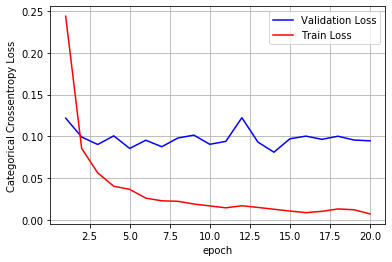

In [22]:
print('Test score:', results[0]) 
print('Test accuracy:', results[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>3 Layer MLP + ReLU + Adam + Dropout + Batch Normalization<h2>

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 107us/sample - loss: 1.0229 - accuracy: 0.6889 - val_loss: 0.2401 - val_accuracy: 0.9463
Epoch 2/20
50000/50000 [==============================] - 4s 76us/sample - loss: 0.4863 - accuracy: 0.8696 - val_loss: 0.1509 - val_accuracy: 0.9589
Epoch 3/20
50000/50000 [==============================] - 4s 76us/sample - loss: 0.3735 - accuracy: 0.9016 - val_loss: 0.1225 - val_accuracy: 0.9658
Epoch 4/20
50000/50000 [==============================] - 4s 74us/sample - loss: 0.3146 - accuracy: 0.9193 - val_loss: 0.1082 - val_accuracy: 0.9700
Epoch 5/20
50000/50000 [==============================] - 4s 77us/sample - loss: 0.2826 - accuracy: 0.9269 - val_loss: 0.1025 - val_accuracy: 0.9720
Epoch 6/20
50000/50000 [==============================] - 4s 74us/sample - loss: 0.2623 - accuracy: 0.9331 - val_loss: 0.0990 - val_accuracy: 0.9738
Epoch 7/20
50000/50000 [==============================]

Test score: 0.08376449742436526
Test accuracy: 0.9797


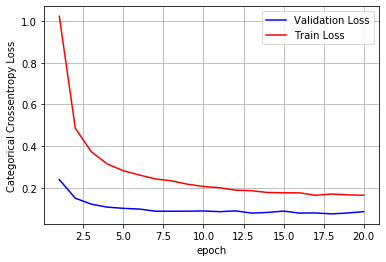

In [24]:
print('Test score:', results[0]) 
print('Test accuracy:', results[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5 Layer MLP + ReLU + Adam</h2>

In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 59us/sample - loss: 0.3018 - accuracy: 0.9075 - val_loss: 0.1428 - val_accuracy: 0.9557
Epoch 2/20
50000/50000 [==============================] - 2s 47us/sample - loss: 0.0996 - accuracy: 0.9704 - val_loss: 0.0936 - val_accuracy: 0.9734
Epoch 3/20
50000/50000 [==============================] - 2s 46us/sample - loss: 0.0678 - accuracy: 0.9786 - val_loss: 0.0908 - val_accuracy: 0.9731
Epoch 4/20
50000/50000 [==============================] - 2s 46us/sample - loss: 0.0473 - accuracy: 0.9857 - val_loss: 0.0950 - val_accuracy: 0.9727
Epoch 5/20
50000/50000 [==============================] - 2s 46us/sample - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0792 - val_accuracy: 0.9782
Epoch 6/20
50000/50000 [==============================] - 2s 47us/sample - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.0902 - val_accuracy: 0.9767
Epoch 7/20
50000/50000 [==============================] 

Test score: 0.10341003260770486
Test accuracy: 0.979


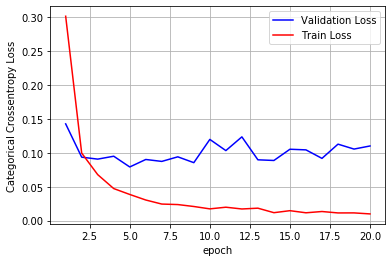

In [26]:
print('Test score:', results[0]) 
print('Test accuracy:', results[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5 Layer MLP + ReLU + Adam + Dropout </h2>

In [27]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 72us/sample - loss: 1.6226 - accuracy: 0.3919 - val_loss: 0.5522 - val_accuracy: 0.8253
Epoch 2/20
50000/50000 [==============================] - 2s 50us/sample - loss: 0.7602 - accuracy: 0.7375 - val_loss: 0.3577 - val_accuracy: 0.8912
Epoch 3/20
50000/50000 [==============================] - 2s 50us/sample - loss: 0.5605 - accuracy: 0.8326 - val_loss: 0.2213 - val_accuracy: 0.9511
Epoch 4/20
50000/50000 [==============================] - 2s 49us/sample - loss: 0.4459 - accuracy: 0.8821 - val_loss: 0.1749 - val_accuracy: 0.9594
Epoch 5/20
50000/50000 [==============================] - 2s 49us/sample - loss: 0.3833 - accuracy: 0.9025 - val_loss: 0.1567 - val_accuracy: 0.9639
Epoch 6/20
50000/50000 [==============================] - 3s 50us/sample - loss: 0.3421 - accuracy: 0.9169 - val_loss: 0.1468 - val_accuracy: 0.9666
Epoch 7/20
50000/50000 [==============================] 

Test score: 0.11896510114474804
Test accuracy: 0.9775


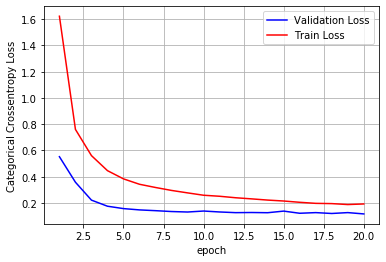

In [28]:
print('Test score:', results[0]) 
print('Test accuracy:', results[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5 Layer MLP + ReLU + Adam + Batch Normalization </h2>

In [29]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 146us/sample - loss: 0.2736 - accuracy: 0.9253 - val_loss: 0.1292 - val_accuracy: 0.9626
Epoch 2/20
50000/50000 [==============================] - 5s 98us/sample - loss: 0.1009 - accuracy: 0.9702 - val_loss: 0.1051 - val_accuracy: 0.9673
Epoch 3/20
50000/50000 [==============================] - 5s 97us/sample - loss: 0.0685 - accuracy: 0.9795 - val_loss: 0.1245 - val_accuracy: 0.9640
Epoch 4/20
50000/50000 [==============================] - 5s 97us/sample - loss: 0.0541 - accuracy: 0.9830 - val_loss: 0.0980 - val_accuracy: 0.9722
Epoch 5/20
50000/50000 [==============================] - 5s 98us/sample - loss: 0.0445 - accuracy: 0.9855 - val_loss: 0.0789 - val_accuracy: 0.9774
Epoch 6/20
50000/50000 [==============================] - 5s 100us/sample - loss: 0.0405 - accuracy: 0.9862 - val_loss: 0.0834 - val_accuracy: 0.9791
Epoch 7/20
50000/50000 [==============================

Test score: 0.08070227301578124
Test accuracy: 0.9804


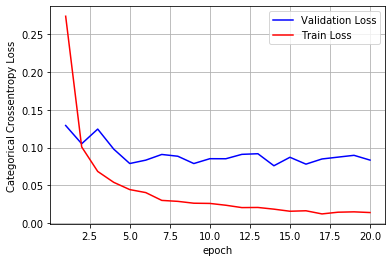

In [30]:
print('Test score:', results[0]) 
print('Test accuracy:', results[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2> 5 Layer MLP + ReLU + Adam + Dropout + Batch Normalization </h2>

In [34]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, verbose=0)
print('test loss, test acc:', results)


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 160us/sample - loss: 1.6968 - accuracy: 0.4231 - val_loss: 0.6340 - val_accuracy: 0.8587
Epoch 2/20
50000/50000 [==============================] - 6s 111us/sample - loss: 0.9007 - accuracy: 0.7210 - val_loss: 0.3158 - val_accuracy: 0.9342
Epoch 3/20
50000/50000 [==============================] - 6s 112us/sample - loss: 0.6374 - accuracy: 0.8206 - val_loss: 0.1934 - val_accuracy: 0.9542
Epoch 4/20
50000/50000 [==============================] - 6s 112us/sample - loss: 0.5133 - accuracy: 0.8652 - val_loss: 0.1571 - val_accuracy: 0.9623
Epoch 5/20
50000/50000 [==============================] - 5s 108us/sample - loss: 0.4401 - accuracy: 0.8882 - val_loss: 0.1375 - val_accuracy: 0.9662
Epoch 6/20
50000/50000 [==============================] - 5s 108us/sample - loss: 0.3923 - accuracy: 0.9023 - val_loss: 0.1314 - val_accuracy: 0.9675
Epoch 7/20
50000/50000 [==========================

Test score: 0.1109049801748246
Test accuracy: 0.9735


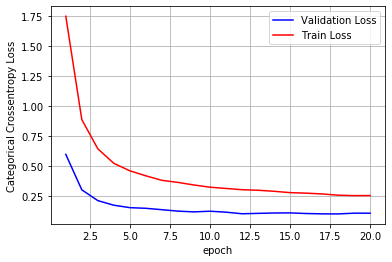

In [32]:
print('Test score:', results[0]) 
print('Test accuracy:', results[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2>Conclusions/Observations</h2>

In [22]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["No of Layers", "Regularization", "Test Loss", "Accuracy"]

x.add_row(["2", "No", 0.091, 98.01])
x.add_row(["2", "Dropout", 0.098, 97.67])
x.add_row(["2", "Batch Normalization", 0.090, 97.79])
x.add_row(["2", "Dropout + Batch Normalization", 0.090, 97.28])
x.add_row(["3", "No", 0.112, 98.09])
x.add_row(["3", "Dropout", 0.100, 97.92])
x.add_row(["3", "Batch Normalization", 0.081, 98.05])
x.add_row(["3", "Dropout + Batch Normalization", 0.083, 97.97])
x.add_row(["5", "No", 0.103, 97.90])
x.add_row(["5", "Dropout", 0.118, 97.75])
x.add_row(["5", "Batch Normalization", 0.807, 98.04])
x.add_row(["5", "Dropout + Batch Normalization", 0.110, 97.35])

print(x)

+--------------+-------------------------------+-----------+----------+
| No of Layers |         Regularization        | Test Loss | Accuracy |
+--------------+-------------------------------+-----------+----------+
|      2       |               No              |   0.091   |  98.01   |
|      2       |            Dropout            |   0.098   |  97.67   |
|      2       |      Batch Normalization      |    0.09   |  97.79   |
|      2       | Dropout + Batch Normalization |    0.09   |  97.28   |
|      3       |               No              |   0.112   |  98.09   |
|      3       |            Dropout            |    0.1    |  97.92   |
|      3       |      Batch Normalization      |   0.081   |  98.05   |
|      3       | Dropout + Batch Normalization |   0.083   |  97.97   |
|      5       |               No              |   0.103   |   97.9   |
|      5       |            Dropout            |   0.118   |  97.75   |
|      5       |      Batch Normalization      |   0.807   |  98

- When dropout is set to 0.2, the val loss and train loss converge faster ie 10 epochs and then starts diverging and overfits
- There is no clear winner amongst the tried models. Each perform similar for this simple dataset.